In [23]:
import cv2
from mtcnn.mtcnn import MTCNN
import time
from PIL import ImageGrab
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

#Special Thanks to this article for the model
#https://towardsdatascience.com/mtcnn-face-detection-cdcb20448ce0

In [8]:
#write while loop to screengrab movie
start = time.time()
frame = 0
length_of_movie_mins = 160

#start loop then switch to full screen movie
while time.time() < start + 60*length_of_movie_mins:
    im = ImageGrab.grab(bbox=[0,0,2880,1800])
    cv2.imwrite(f'data/harry_potter/frame_{frame}.jpg', np.array(im))
    frame += 1

In [9]:
#Initializing model, get mustache function
detector = MTCNN()

def get_mustache(face):
    bounding_box = face['box']
    keypoints = face['keypoints']
    mustache = ((keypoints['nose'][0] + keypoints['mouth_left'][0] + keypoints['mouth_right'][0])//3,
                (keypoints['nose'][1] + keypoints['mouth_left'][1] + keypoints['mouth_right'][1])//3)
    return mustache

In [21]:
#Loop logic for grabbing mustaches
mustaches = []
for file in tqdm(os.listdir('data/harry_potter/')):
    image = cv2.imread(f'data/harry_potter/{file}')
    result = detector.detect_faces(image)
    for face in result:
        mustache_location = get_mustache(face)
        mustaches.append(mustache_location)

100%|██████████| 79/79 [04:35<00:00,  2.86s/it]


In [ ]:
#Create a 3D histogram of mustache locations

In [24]:
x = []
y = []
for location in mustaches:
    x.append(location[0])
    y.append(1800-location[1])

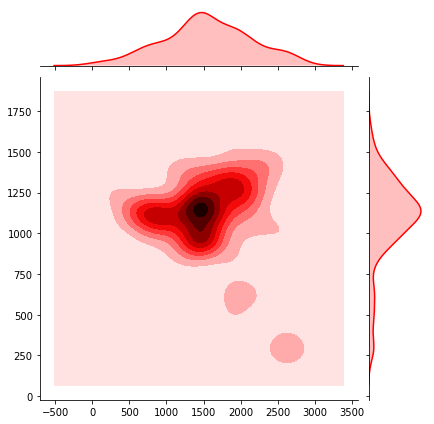

In [35]:
sns.jointplot(x=x, y=y, kind='kde', color='red')

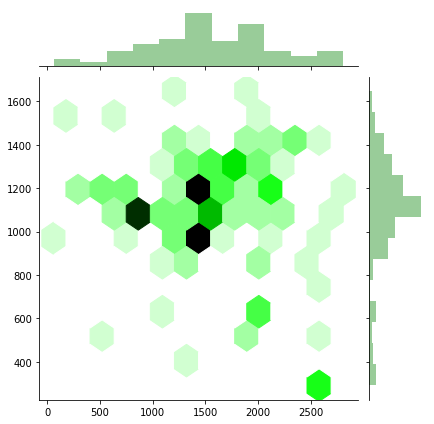

In [36]:
sns.jointplot(x=x, y=y, kind='hex', color='green')

In [39]:
#Draw on and show an image
cv2.rectangle(image,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (255,155,0),
              2)
cv2.circle(image,(keypoints['nose']), 2, (255,155,0), 2)
cv2.circle(image,(keypoints['mouth_left']), 2, (255,155,0), 2)
cv2.circle(image,(keypoints['mouth_right']), 2, (255,155,0), 2)
cv2.circle(image,(mustache), 3, (0,0,230), 2)

cv2.imwrite("image_drawn.jpg", image)
cv2.imshow("image",image)
cv2.waitKey(0)

113